In [1]:
#Context---
#This datasets contains data from RBI which is published annually and this data has different features
#such as:
#2000-01-INC = Income of each state for the year 2001 2011-12-INC = Income of each state for the year 2011
#2001 - LIT = Literacy rate of each state for the year 2001 2011- LIT = Literacy rate of each state for the year 2011
#2001 - POP = Total population of each state for the year 2001 2011- POP = Total population of each state for the year 2011
#2001 -SEX_Ratio = Sex_Ratio of the each state for the year 2001 2011 -SEX_Ratio = Sex_Ratio of the each state for the year 2011
#2001 -UNEMP = Unemployment rate of the each state for the year 2001 2011 -UNEMP = Unemployment rate of the each state for the year 2011
#2001 -Poverty = Poverty rate of the each state for the year 2001 2011 -Poverty = Poverty rate of the each state for the year 2001
#Unemployment Rate - for a month is calculated using the following formula: The monthly estimations for India are calculated as a ratio of the total estimated unemployed persons in India to the total estimated labor force for a month

#Poverty rate = A common method used to estimate poverty in India is based on the income or consumption levels and if the income or consumption falls below a given minimum level, then the household is said to be Below the Poverty Line

#state's Income measured using state domestic product - is the total value of goods and services produced during any financial year within the geographical boundaries of a state

#Literacy rate - Total number of literate persons in a given age group, expressed as a percentage of the total population in that age group. The adult literacy rate measures literacy among persons aged 15 years and above, and the youth literacy rate measures literacy among persons aged 15 to 24 years


In [2]:
#let us start with some basic imports

# for data Analysis

import numpy as np
import pandas as pd

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# k-means for cluster
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
from plotly import __version__

import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [4]:
df = pd.read_csv('RBI_data.csv')

In [7]:
df.head(4)

,States_Union Territories,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,Andaman and Nicobar Islands,25047,89642,81.30,86.63,356,381,846,876,34,54,20.99,1.00
1,Andhra Pradesh,17195,64773,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,Arunachal Pradesh,15260,71366,54.34,65.39,1098,1384,893,938,5,17,33.47,34.67
3,Assam,12803,36320,63.25,72.19,26656,31206,935,958,39,45,36.09,31.98


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   States_Union Territories  32 non-null     object 
 1   2000-01-INC               32 non-null     int64  
 2   2011-12-INC               32 non-null     int64  
 3   2001 - LIT                32 non-null     float64
 4   2011- LIT                 32 non-null     float64
 5   2001 - POP                32 non-null     int64  
 6   2011- POP                 32 non-null     int64  
 7   2001 -SEX_Ratio           32 non-null     int64  
 8   2011 -SEX_Ratio           32 non-null     int64  
 9   2001 -UNEMP               32 non-null     int64  
 10  2011 -UNEMP               32 non-null     int64  
 11  2001 -Poverty             32 non-null     float64
 12  2011 -Poverty             32 non-null     float64
dtypes: float64(4), int64(8), object(1)
memory usage: 3.4+ KB


In [9]:
# basic descriptive statistics for 2001
df[['2000-01-INC','2001 - LIT','2001 - POP','2001 -SEX_Ratio','2001 -UNEMP','2001 -Poverty']].describe()

,2000-01-INC,2001 - LIT,2001 - POP,2001 -SEX_Ratio,2001 -UNEMP,2001 -Poverty
count,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000
mean,19696.53125,69.810625,32134.437500,928.87500,21.406250,22.627500
std,10191.63120,11.149199,38054.631775,56.70737,20.731555,12.279176
min,6415.00000,47.000000,356.000000,777.00000,4.000000,3.480000
25%,12965.75000,62.950000,2218.000000,896.75000,8.000000,12.180000
50%,16418.00000,68.975000,20989.500000,934.50000,17.000000,21.395000
75%,22781.50000,78.945000,53765.000000,969.00000,25.000000,32.870000
max,49771.00000,90.860000,166198.000000,1058.00000,93.000000,47.150000


In [10]:
# descriptive statistics for 2011
df[['2011-12-INC','2011- LIT','2011- POP','2011 -SEX_Ratio','2011 -UNEMP','2011 -Poverty']].describe()

,2011-12-INC,2011- LIT,2011- POP,2011 -SEX_Ratio,2011 -UNEMP,2011 -Poverty
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,74792.500000,78.240313,37818.843750,945.468750,29.468750,18.591562
std,40960.182286,8.733646,45189.884314,53.105485,32.223999,11.086188
min,22582.000000,61.800000,381.000000,818.000000,3.000000,1.000000
25%,47958.000000,71.712500,2636.750000,916.500000,9.000000,9.855000
50%,66413.000000,77.465000,25448.000000,949.000000,20.500000,15.670000
75%,89198.000000,86.090000,62958.250000,976.750000,28.250000,29.985000
max,211570.000000,94.000000,199812.000000,1084.000000,151.000000,39.930000


<Figure size 1000x600 with 0 Axes>

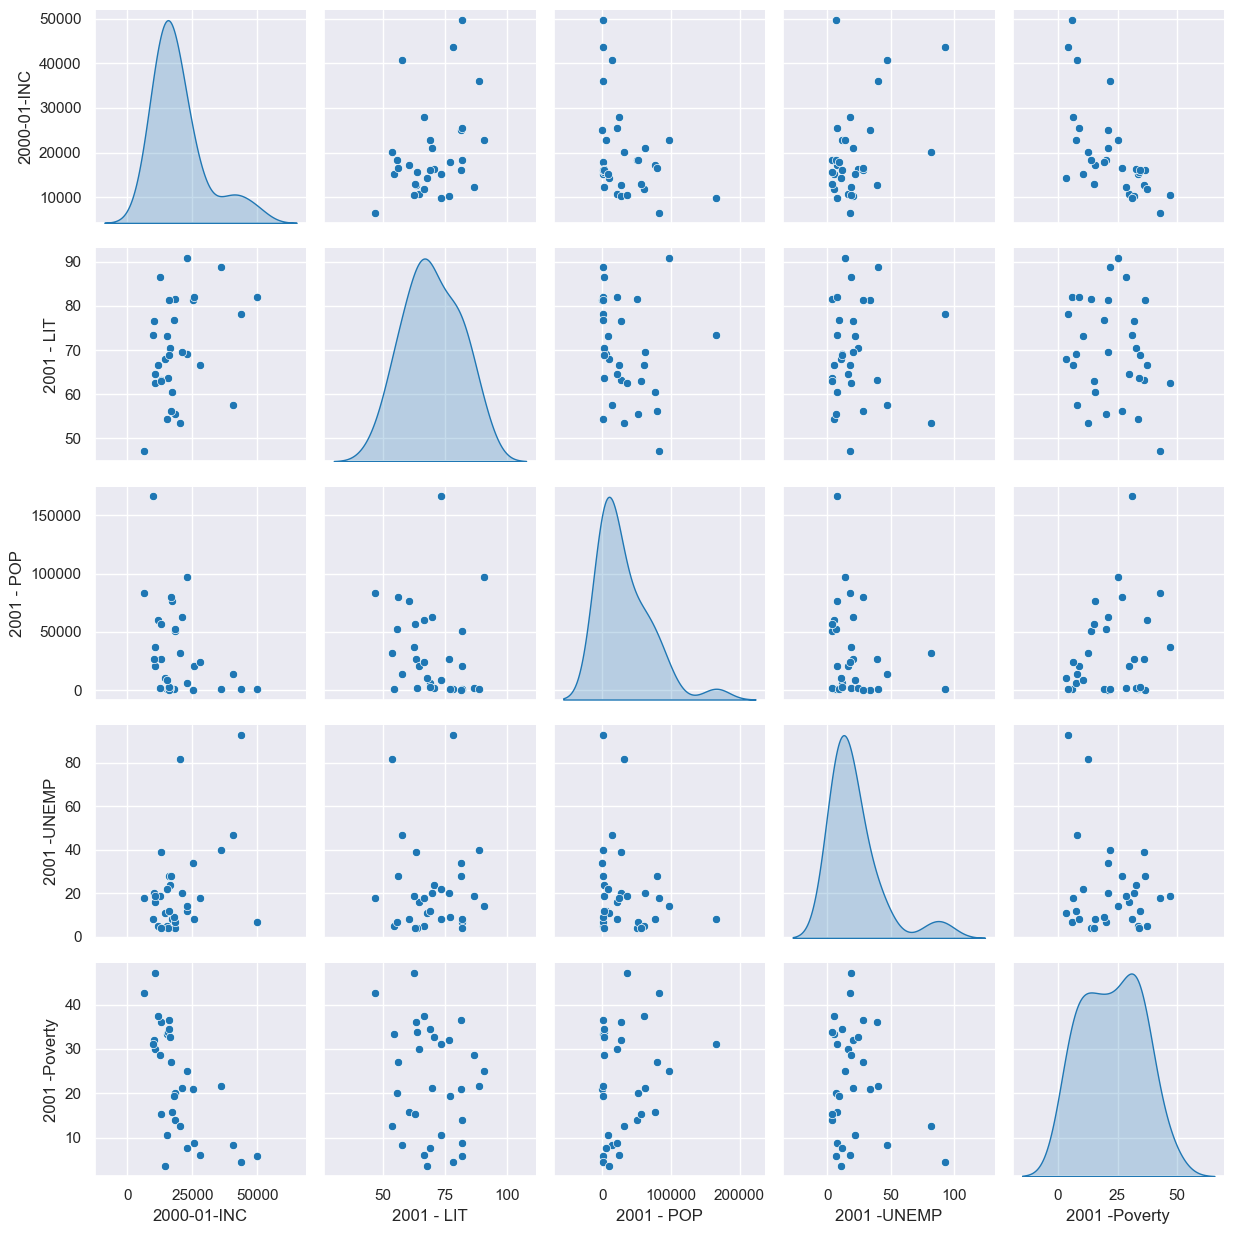

In [12]:
#Data -visualization // Analysis 
#plotting pariplot for 2001 state's income, Literacy rate, Poverty rate and umeployment rate

# data for plot
df_plot_data_2001 = df[['2000-01-INC','2001 - LIT','2001 - POP','2001 -UNEMP','2001 -Poverty']]

#plotting in seaborn
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,6))
sns.set_context(context ='notebook',font_scale=1);
sns.pairplot(df_plot_data_2001,aspect=1,palette='Blues',diag_kind='kde');
plt.tight_layout();

<Figure size 1000x600 with 0 Axes>

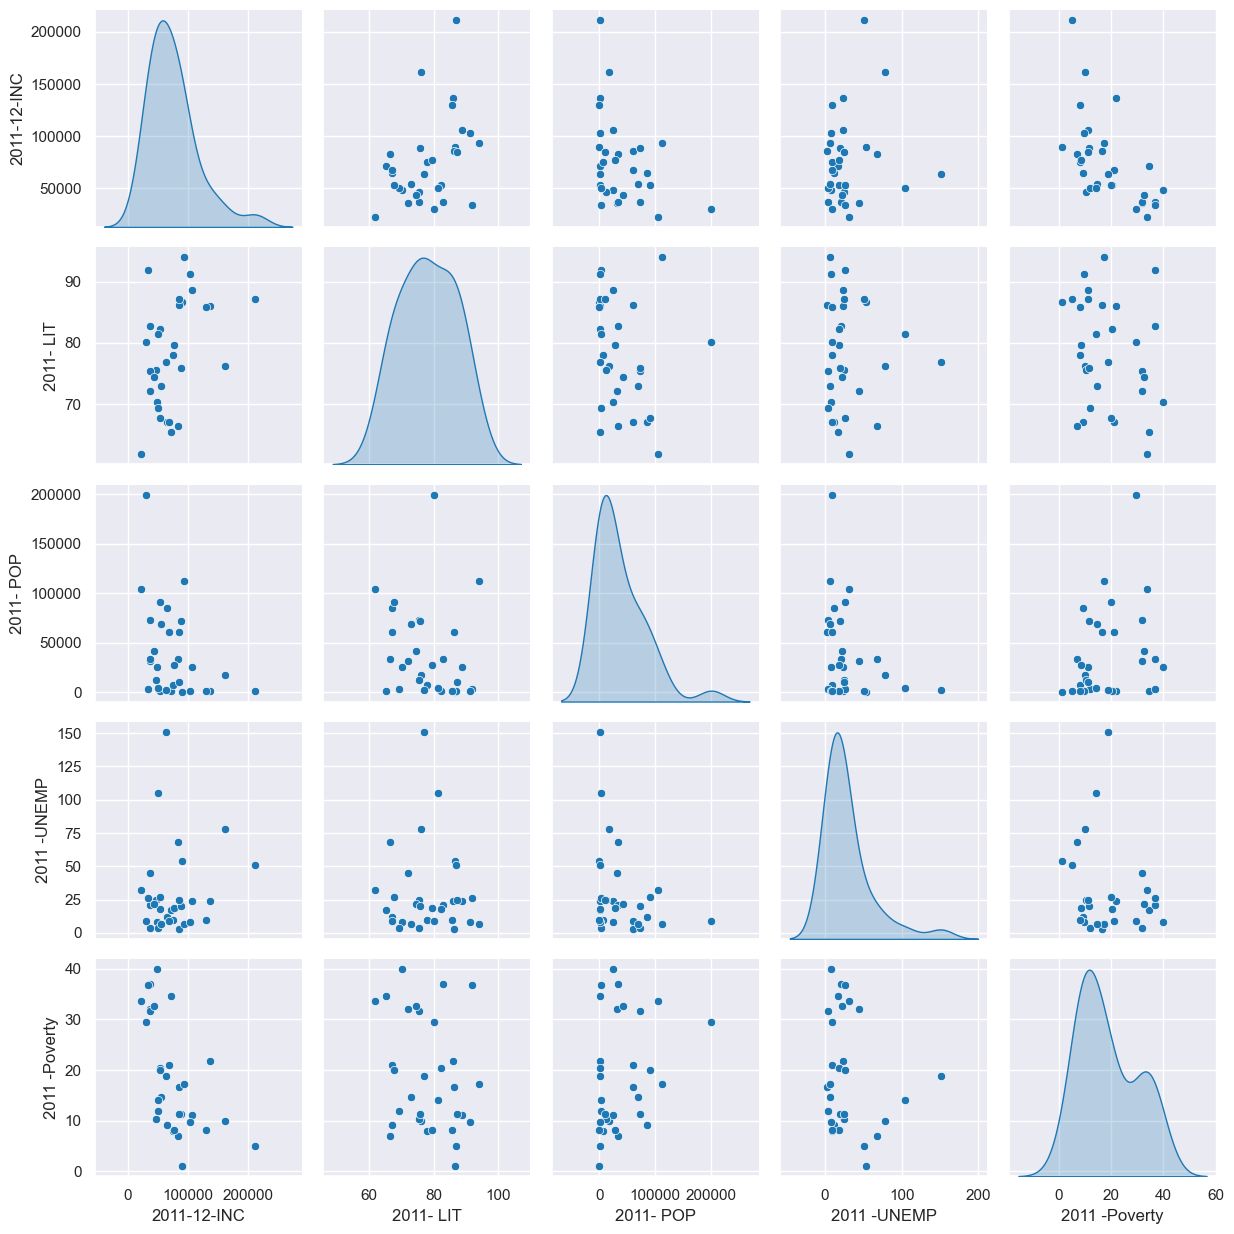

In [13]:
#plotting pariplot for 2001 state's income, Literacy rate, Poverty rate and umeployment rate

# data for plot
df_plot_data_2011 = df[['2011-12-INC','2011- LIT','2011- POP','2011 -UNEMP','2011 -Poverty']]

# plotting in seaborn
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,6))
sns.set_context(context ='notebook',font_scale=1);
sns.pairplot(df_plot_data_2011,aspect=1,palette='Blues',diag_kind='kde');
plt.tight_layout();

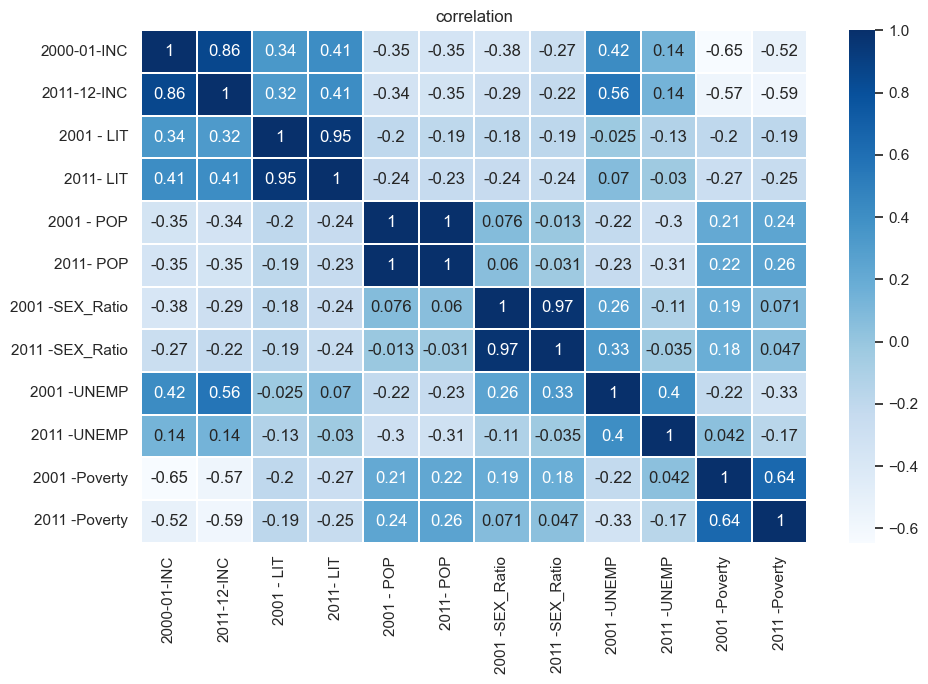

In [14]:
# correlation of the df
df_corr = df.corr()

#plotting in seaborn
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,cmap='Blues',annot=True,linewidths=0.2,linecolor='white')
plt.title('correlation')
plt.tight_layout()

In [15]:
# min max scaler function

def min_max(x, y):
    y_min = y.min()
    y_max = y.max()
    MM = (x- y_min)/(y_max - y_min)
    return MM

In [16]:
#INCOME VS LITERACY RATE 

In [17]:
# plotting Indian State's Income vs Literacy rate in year 2001

# data for plot
df_lit_inc_2001 = df[['States_Union Territories','2000-01-INC','2001 - LIT']]

# normalization of data because of different scale 
min_INC = df_lit_inc_2001['2000-01-INC'].min()
max_INC = df_lit_inc_2001['2000-01-INC'].max()

min_LIT = df_lit_inc_2001['2001 - LIT'].min()
max_LIT = df_lit_inc_2001['2001 - LIT'].max()

df_lit_inc_2001['2000-01-INC'] = df_lit_inc_2001['2000-01-INC'].apply(lambda x : (x- min_INC)/(max_INC - min_INC))
df_lit_inc_2001['2001 - LIT'] = df_lit_inc_2001['2001 - LIT'].apply(lambda x : (x- min_LIT)/(max_LIT - min_LIT))

# line plot in plotly
df_lit_inc_2001.iplot(kind='line',x='States_Union Territories',secondary_y='2001 - LIT',
                      colors=['#53D1BA','#D11E5D'],title='India State Income vs Literacy rate year_2001',
                      xTitle='States in India',yTitle='State Income_SDP',
                      secondary_y_title='literacy rate',theme='pearl')

# to see how closely the each state's income and Literacy rate is 

In [18]:
# plotting Indian State's Income vs Literacy rate in year 2011

# data for plot
df_lit_inc_2011 = df[['States_Union Territories','2011-12-INC','2011- LIT']]

# normalization
df_lit_inc_2011['2011-12-INC'] = min_max(df_lit_inc_2011['2011-12-INC'],df_lit_inc_2011['2011-12-INC'])
df_lit_inc_2011['2011- LIT'] = min_max(df_lit_inc_2011['2011- LIT'],df_lit_inc_2011['2011- LIT'])

# plot
df_lit_inc_2011.iplot(x ='States_Union Territories',y='2011-12-INC',secondary_y ='2011- LIT',
                      colors = ['#70a3f9','#e7c269'],
                      title = 'India State Income vs Literacy rate year_2011',
                      xTitle='States in India',
                      yTitle ='State Income_SDP',secondary_y_title = 'literacy rate',
                     theme = 'pearl')

In [19]:
# calculating percentage change in the Income of the states and plotting

#increase = Increase ÷ Original Number × 100.

# took a copy of df and named it
df1 = df.copy()

# percentage change in income of the state
df1['INC_percentage_change'] = (df1['2011-12-INC'] - df1['2000-01-INC']) / df1['2000-01-INC']

In [20]:
# sorting before plot

df1_sorted = df1.sort_values(by='INC_percentage_change',ascending=True)

# plotting percentage change in states income from 2000 to 2011

df1_sorted.iplot(kind='bar',x='States_Union Territories',
                 y='INC_percentage_change',
                 theme='white',colors='#2997B7',
                title='percentage change in states income from 2000 to 2011',
                 yTitle = 'percentage')

In [21]:
#ploting percentage change in Literacy rate in each state

#data for plot
df1['literacy_pct_change'] = df1['2011- LIT'] - df1['2001 - LIT']

#plot
df1.sort_values('literacy_pct_change').iplot(kind = 'bar',x = 'States_Union Territories',yTitle = 'percentage',
                                             y = 'literacy_pct_change',theme='white',colors='#1ABC9C',
                                             title = 'percentage change in states Literacy rate from 2000 to 2011')

In [22]:
# sorting and ploting percentage change in Literacy rate

df1.sort_values(by='literacy_pct_change').iplot(kind='line',x='States_Union Territories',y='INC_percentage_change',
                                               secondary_y='literacy_pct_change',secondary_y_title='Literacy rate change',
                                               title='Percentage change in Income vs percentage change in literacy rate from 2001 to 2011',
                                                yTitle='percentage',xTitle = 'States in India')

In [23]:
#plotting Poverty rate vs Literacy rate in 2001

pov_lit_rate_2001 = df1[['States_Union Territories','2001 -Poverty','2001 - LIT']]

pov_lit_rate_2001.iplot(kind='line',x='States_Union Territories',y='2001 - LIT',secondary_y='2001 -Poverty',secondary_y_title='poverty rate',
                        colors=['#ff6f69','#ffcc5c'],title='Poverty rate vs Literacy rate in each states in the 2001',
                        xTitle='States in India',yTitle='Literacy rate')

In [24]:
pov_lit_rate_2011 = df1[['States_Union Territories','2011 -Poverty','2011- LIT']]
        

pov_lit_rate_2011.sort_values(by='2011 -Poverty').iplot(kind='line',x='States_Union Territories',y='2011- LIT',secondary_y='2011 -Poverty',secondary_y_title='poverty rate',
                        colors=['#ff6f69','#ffcc5c'],title='Poverty rate vs Literacy rate in each states in the year 2011',
                        yTitle='Literacy rate',xTitle='States in India')

In [25]:
#State INCOME VS POVERTY RATE 

In [26]:
# data for plot
pov_income_rate_2001 = df1[['States_Union Territories','2001 -Poverty','2000-01-INC']]

# normalization
pov_income_rate_2001['2001 -Poverty'] = min_max(pov_income_rate_2001['2001 -Poverty'],pov_income_rate_2001['2001 -Poverty'])
pov_income_rate_2001['2000-01-INC'] = min_max(pov_income_rate_2001['2000-01-INC'],pov_income_rate_2001['2000-01-INC'])
        
# plotting state income vs poverty rate in 2001
pov_income_rate_2001.sort_values(by='2000-01-INC').iplot(kind='bar',x='States_Union Territories',y='2000-01-INC',secondary_y='2001 -Poverty',secondary_y_title='poverty rate',
                        colors=['#1ebbd7','#ffcc5c'],title='state Income vs Poverty rate in each states in the 2001',
                        yTitle='State income',xTitle ='States in india')

In [27]:
state_income_Pov_rate_2011 = df1[['States_Union Territories','2011 -Poverty','2011-12-INC']]
        
state_income_Pov_rate_2011['2011 -Poverty'] = min_max(state_income_Pov_rate_2011['2011 -Poverty'],
                                                      state_income_Pov_rate_2011['2011 -Poverty'])

state_income_Pov_rate_2011['2011-12-INC'] = min_max(state_income_Pov_rate_2011['2011-12-INC'],
                                                      state_income_Pov_rate_2011['2011-12-INC']) 

state_income_Pov_rate_2011.sort_values(by='2011-12-INC').iplot(kind='bar',
                            x ='States_Union Territories',y ='2011-12-INC',
                            secondary_y ='2011 -Poverty',secondary_y_title='poverty rate',
                            colors =['#05ffa1','#b967ff'],
                            title ='state Income vs Poverty rate in each states in the 2011',
                            yTitle ='State income',xTitle ='States in india')

In [28]:
df_2011_in = df[['2011-12-INC','2011- LIT','2011- POP','2011 -UNEMP','2011 -Poverty']]

In [29]:
# KMeans

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

In [30]:
# scaling the data

std_df = pd.DataFrame(std_scale.fit_transform(df_2011_in),columns=df_2011_in.columns)

In [31]:
# K Means cluster 

k_means = KMeans(n_clusters = 4,random_state=1)

k_means.fit(std_df)

KMeans(n_clusters=4, random_state=1)

In [32]:
labels = k_means.labels_

In [33]:
df_2011_in["kmeans_4_cluster"] = labels

df_2011_in.head()

,2011-12-INC,2011- LIT,2011- POP,2011 -UNEMP,2011 -Poverty,kmeans_4_cluster
0,89642,86.63,381,54,1.00,2
1,64773,67.02,84581,12,9.20,0
2,71366,65.39,1384,17,34.67,1
3,36320,72.19,31206,45,31.98,1
4,22582,61.80,104099,32,33.74,1


In [34]:
df_2011_in["Name_of_State"] = df['States_Union Territories']

In [35]:
df_2011_in['kmeans_4_cluster'].unique()

array([2, 0, 1, 3])

In [36]:
df_cluster =df_2011_in.groupby(['kmeans_4_cluster']).mean()


In [37]:
# Tree plot
fig = px.treemap(df_2011_in, path = ['kmeans_4_cluster', 'Name_of_State'], values = '2011-12-INC',
                title="Clusters based on the income level and population",template='none')
fig.show()

In [38]:
#final observation
# states like Goa,Delhi,Chandigarh,Haryana,Puducherry,Sikkim,Andaman and Nicobar,uttaraKhand are od type 2 category
#states like Mharastra,Tamil Nadu,Gujarat,Kerala,Himachal Pradesh,Pujab,Rajasthan,Andhra Pradesh,meghalaya,Mizoram,Jammu and Kashmir are of type 0 category 
#states like Arunchal Pradesh,Karnataka,West Bengal,Madhya pradesh,jarkhand,Chhattisgarh,Assam,Manipur,Odisha,UttarPradesh,Bihar are of type 1 category
#states likw Nagaland and Tripura are of type 3 category